<a href="https://colab.research.google.com/github/pallavi232003/Rproject2/blob/main/R_ec_model_trining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded=files.upload()


Saving ecommerce_sales_data_realistic.csv to ecommerce_sales_data_realistic.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv("ecommerce_sales_data_realistic.csv")
df.head()

,Order_ID,Customer_ID,Product_ID,Category,Sub_Category,Purchase_Date,Quantity,Unit_Price,Total_Price,City,Country,Payment_Method,Discount,Profit_Margin,Order_Status
0,89134fe4-8655-4830-a447-b2909f45a323,88849a20-4051-4d66-901c-c951c0f27b20,a333df76-8511-4e17-acbb-458249740ee7,Clothing,Shoes,2023-06-12,3.0,60.45,150.52,Lawsonfurt,NaN,Cash on Delivery,NaN,9.63,Returned
1,NaN,0b1e3c62-3fe2-420f-9c62-8e5e51d1a34c,1c8a048b-8e01-4458-a7e9-a358209f54ee,Home & Kitchen,Decor,2024-03-16,2.0,425.94,792.25,East Williamburgh,Guinea,Cash on Delivery,0.07,157.66,Completed
2,6c65c163-01ab-46ff-917f-95a5b6d75147,5bcdc529-1c1d-44a5-a3da-c1bea08ba795,8405b1ec-6d51-4c90-bf0f-67afee9ca517,Books,Comics,2023-06-18,4.0,205.88,634.11,East Carolineborough,Moldova,Debit Card,0.23,NaN,Cancelled
3,3ee23373-a4cb-47cb-8aed-8c4d8f373a51,89e503dd-e5c3-4fc8-a9f7-c5a5b9c21dae,a5c211b4-c038-40af-8989-b0c4330ce22e,Home & Kitchen,Appliances,2023-08-01,5.0,44.53,184.80,Ashleymouth,Chile,PayPal,0.17,32.58,Returned
4,b466f4ef-59f9-4dfb-8e8a-66cd0d7bdac0,0e9b67eb-8999-4dd3-8257-6c4a611161f1,fdd68240-1def-4136-8568-839c9005b0f3,Clothing,Shoes,2024-01-27,2.0,480.90,913.71,East Ericaland,Kuwait,Debit Card,0.05,NaN,Returned


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101000 entries, 0 to 100999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order_ID        96039 non-null  object 
 1   Customer_ID     95997 non-null  object 
 2   Product_ID      96197 non-null  object 
 3   Category        96149 non-null  object 
 4   Sub_Category    96068 non-null  object 
 5   Purchase_Date   96147 non-null  object 
 6   Quantity        96050 non-null  float64
 7   Unit_Price      96007 non-null  float64
 8   Total_Price     96101 non-null  float64
 9   City            95950 non-null  object 
 10  Country         95993 non-null  object 
 11  Payment_Method  96058 non-null  object 
 12  Discount        96168 non-null  float64
 13  Profit_Margin   96032 non-null  float64
 14  Order_Status    96046 non-null  object 
dtypes: float64(5), object(10)
memory usage: 11.6+ MB


In [ ]:
df. describe()

,Quantity,Unit_Price,Total_Price,Discount,Profit_Margin
count,96050.000000,96007.000000,96101.000000,96168.000000,96032.000000
mean,3.001114,252.414305,643.493628,0.149847,112.510965
std,1.413458,142.757254,510.700784,0.086811,107.355685
min,1.000000,5.000000,3.870000,0.000000,0.250000
25%,2.000000,129.185000,237.130000,0.070000,33.970000
50%,3.000000,252.310000,500.450000,0.150000,77.510000
75%,4.000000,375.855000,947.880000,0.230000,158.012500
max,5.000000,500.000000,2498.900000,0.300000,729.200000


In [ ]:
df.size

1515000

In [ ]:
df.shape

(101000, 15)

In [ ]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Product_ID', 'Category', 'Sub_Category',
       'Purchase_Date', 'Quantity', 'Unit_Price', 'Total_Price', 'City',
       'Country', 'Payment_Method', 'Discount', 'Profit_Margin',
       'Order_Status'],
      dtype='object')

In [ ]:
cat_cols = df.select_dtypes(include=['object' , 'category']).columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Categorical Columns:",list(cat_cols))
print("Numerical Columns:", list(num_cols))

Categorical Columns: ['Order_ID', 'Customer_ID', 'Product_ID', 'Category', 'Sub_Category', 'Purchase_Date', 'City', 'Country', 'Payment_Method', 'Order_Status']
Numerical Columns: ['Quantity', 'Unit_Price', 'Total_Price', 'Discount', 'Profit_Margin']


In [ ]:
df.duplicated().sum()

np.int64(1000)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Order_ID,4908
Customer_ID,4959
Product_ID,4748
Category,4783
Sub_Category,4885
Purchase_Date,4815
Quantity,4893
Unit_Price,4939
Total_Price,4838
City,5000


In [ ]:
# Filling categorical columns with mode
for col in ['Category', 'Sub_Category', 'Payment_Method', 'Order_Status']:
    mode_val = df[col].mode()[0]
    df[col].fillna(mode_val, inplace=True)

# Filling Purchase_Date with a placeholder
df['Purchase_Date'].fillna('Unknown', inplace=True)

# Fill Quantity with median
quantity_median = df['Quantity'].median()
df['Quantity'].fillna(quantity_median, inplace=True)

# Fill Unit_Price with random sampling
df['Unit_Price'] = df['Unit_Price'].apply(
    lambda x: x if pd.notnull(x) else df['Unit_Price'].dropna().sample(1).values[0]
)

In [ ]:
df['Profit_Margin'].fillna(df['Profit_Margin'].median(), inplace=True)

In [ ]:
df['Discount'].fillna(df['Discount'].mean(), inplace=True)

In [ ]:
df.isnull().sum()

,0
Order_ID,4908
Customer_ID,4959
Product_ID,4748
Category,0
Sub_Category,0
Purchase_Date,0
Quantity,0
Unit_Price,0
Total_Price,4838
City,5000


We added New column here[id will work as primary for the customer data, so we must have the proper and unique id for every row], cause for both 'Order_ID -- 4908' and 'Customer_ID --	4959' we do have the missing values. so we merge both "order_id and customer_id" and creates a new column called "New_Combined_id".

In [ ]:
df['New_Combined_ID'] = df.apply(
    lambda row: str(row['Order_ID']) if pd.isna(row['Customer_ID'])
    else row['Customer_ID'] + str(row['Order_ID']),
    axis=1
)


In [ ]:
cols = ['New_Combined_ID'] + [col for col in df.columns if col != 'New_Combined_ID']
df = df[cols]

as we created a new column above, we dont require this column

['Order_ID','Customer_ID','Product_ID']

In [ ]:
df.drop(['Order_ID','Customer_ID','Product_ID'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['New_Combined_ID', 'Category', 'Sub_Category', 'Purchase_Date',
       'Quantity', 'Unit_Price', 'Total_Price', 'City', 'Country',
       'Payment_Method', 'Discount', 'Profit_Margin', 'Order_Status'],
      dtype='object')

<Axes: title={'center': 'Top Categories'}, xlabel='Category'>

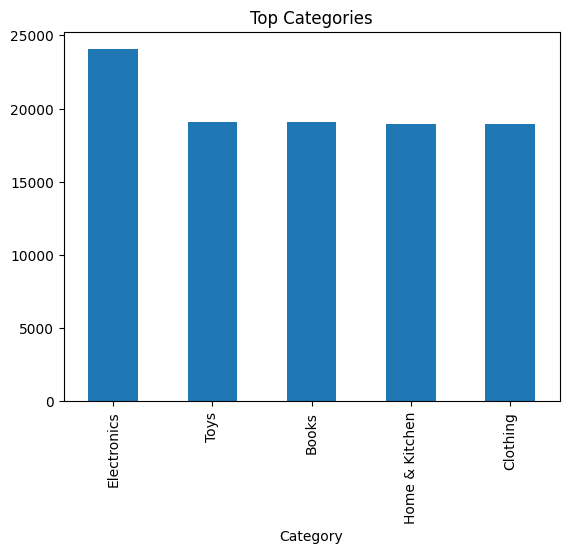

In [ ]:
df['Category'].value_counts().plot(kind='bar', title="Top Categories")


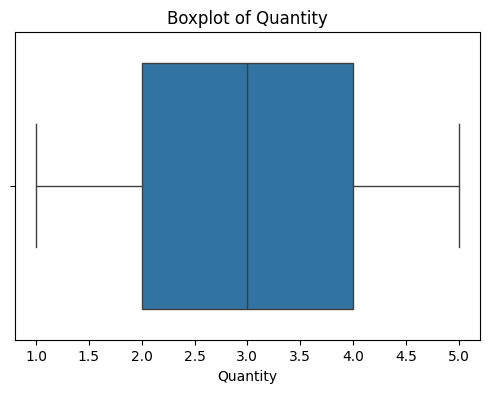

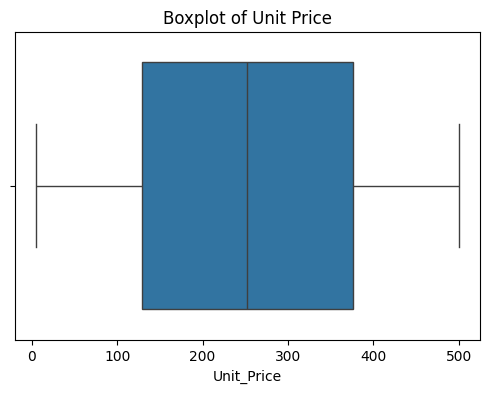

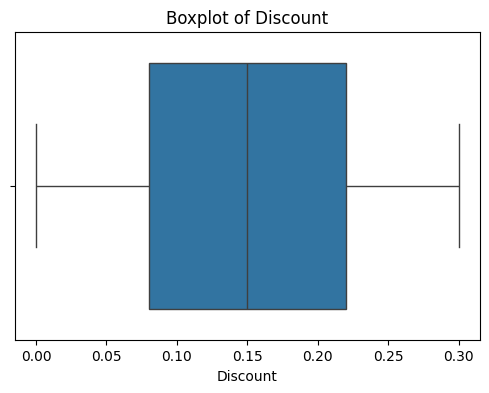

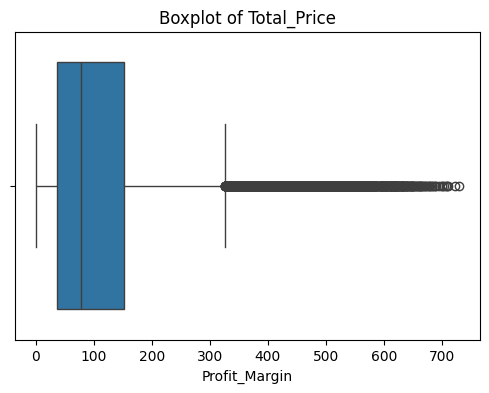

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot of Quantity')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['Unit_Price'])
plt.title('Boxplot of Unit Price')
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x=df['Discount'])
plt.title('Boxplot of Discount')
plt.show()


plt.figure (figsize=(6,4))
sns.boxplot(x=df['Profit_Margin'])
plt.title('Boxplot of Total_Price')
plt.show()

In [ ]:
Q1 = df['Profit_Margin'].quantile(0.25)
Q3 = df['Profit_Margin'].quantile(0.75)
IQR = Q3 - Q1

print(f"Q1: {Q1}")
print(f"Q3: {Q3}")
print(f"IQR: {IQR}")

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}")
print(f"Upper bound: {upper_bound}")

# Filter non-outliers
df_no_outliers = df[(df['Profit_Margin'] >= lower_bound) & (df['Profit_Margin'] <= upper_bound)]

# Calculate number of outliers
num_outliers = df.shape[0] - df_no_outliers.shape[0]

print(f"Original dataset size: {df.shape[0]}")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]}")
print(f"Number of outliers in Profit_Margin: {num_outliers}")

Q1: 35.77
Q3: 152.2225
IQR: 116.45249999999999
Lower bound: -138.90874999999997
Upper bound: 326.90125
Original dataset size: 100000
Dataset size after removing outliers: 94641
Number of outliers in Profit_Margin: 5359


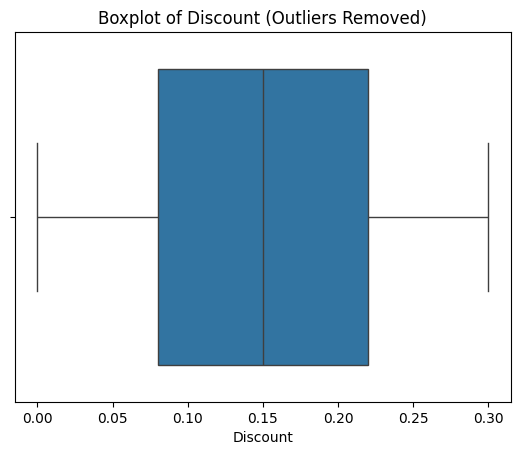

In [ ]:
sns.boxplot(x='Discount', data=df_no_outliers)
plt.title('Boxplot of Discount (Outliers Removed)')
plt.show()

<Axes: title={'center': 'City-wise Sales'}, xlabel='City'>

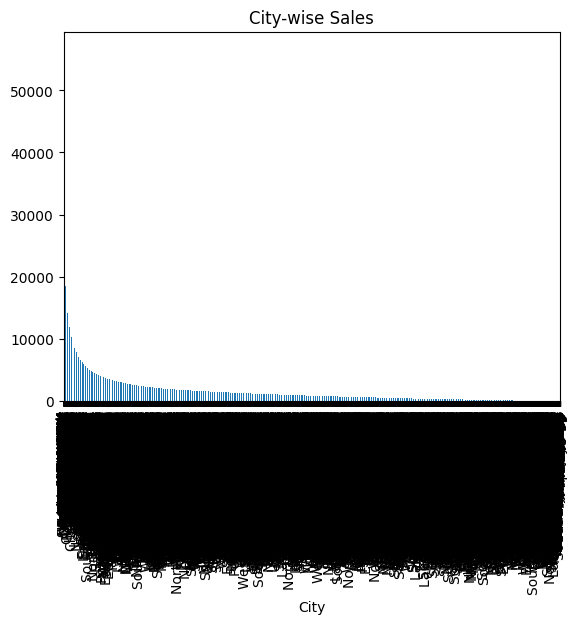

In [ ]:
city_sales = df.groupby('City')['Total_Price'].sum().sort_values(ascending=False)
city_sales.plot(kind='bar', title="City-wise Sales")


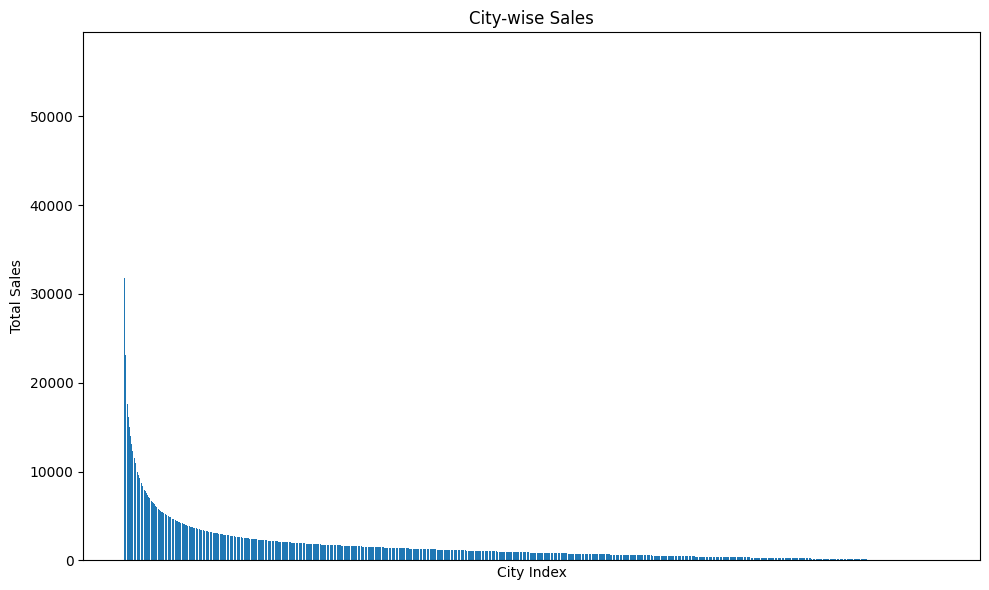

In [ ]:
plt.figure(figsize=(10, 6)) # Optional: adjust figure size for better readability
plt.bar(city_sales.index, city_sales.values)
plt.title("City-wise Sales")
plt.xlabel("City Index") # You can change this label if needed
plt.ylabel("Total Sales")
plt.xticks([]) # This line removes the x-axis tick labels (the city names)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

<Axes: title={'center': 'Payment Methods'}, ylabel='count'>

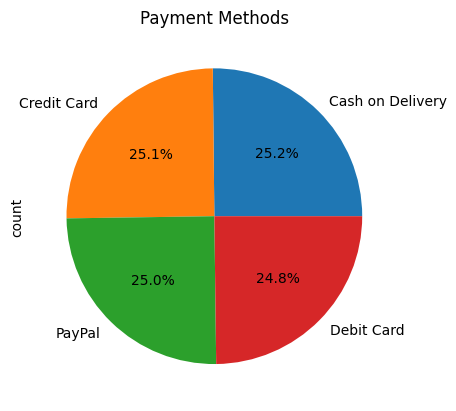

In [ ]:
df['Payment_Method'].value_counts().plot(kind='pie', autopct='%1.1f%%', title='Payment Methods')


<Axes: xlabel='Profit_Margin', ylabel='Count'>

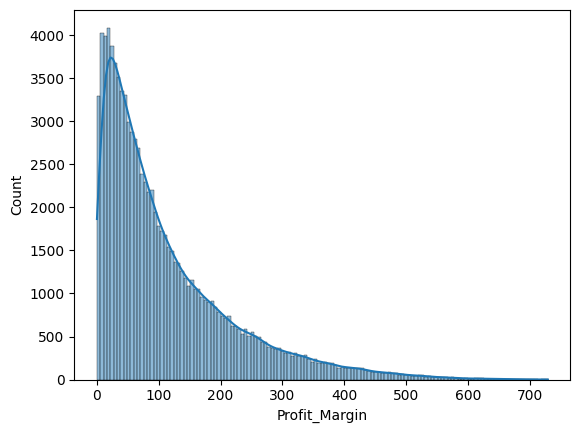

In [ ]:

sns.histplot(df['Profit_Margin'], kde=True)


In [ ]:
customer_df = df.groupby('New_Combined_ID').agg({
    'Total_Price': 'sum',
    'Quantity': 'sum',
    'Discount': 'mean',
    'Profit_Margin': 'mean',
    'Unit_Price': 'mean',
    'Order_Status': lambda x: (x == 'Delivered').sum()
}).reset_index()

customer_df['Frequency'] = df.groupby('New_Combined_ID')['Order_Status'].count().values
customer_df['Repeat_Buyer'] = (customer_df['Frequency'] > 1).astype(int)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


X = customer_df[['Total_Price', 'Quantity', 'Discount', 'Profit_Margin', 'Unit_Price']]
y = customer_df['Repeat_Buyer']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19950
           1       0.00      0.00      0.00         1

    accuracy                           1.00     19951
   macro avg       0.50      0.50      0.50     19951
weighted avg       1.00      1.00      1.00     19951

